<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="images/book_cover.jpg" width="120">

*This notebook is an extension from the [Python Programming and Numerical Methods - A Guide for Engineers and Scientists](https://www.elsevier.com/books/python-programming-and-numerical-methods/kong/978-0-12-819549-9), the content is also available at [Berkeley Python Numerical Methods](https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work on [Elsevier](https://www.elsevier.com/books/python-programming-and-numerical-methods/kong/978-0-12-819549-9) or [Amazon](https://www.amazon.com/Python-Programming-Numerical-Methods-Scientists/dp/0128195495/ref=sr_1_1?dchild=1&keywords=Python+Programming+and+Numerical+Methods+-+A+Guide+for+Engineers+and+Scientists&qid=1604761352&sr=8-1)!*

<!--NAVIGATION-->
< [25.1 Concept of Machine Learning](chapter25.01-Concept-of-Machine-Learning.ipynb) | [Contents](Index.ipynb) | [25.3 Regression](chapter25.03-Regression.ipynb) >

# Classification

Classification is a very common problems in the real world. For example, we want to classify some products into good and bad quality, emails into good or junk, books into interesting or boring, and so on. As discussed before, two key factors make a problem into a classification problem, (1) the problem has correct answer (labels), and (2) the output we want is categorical data, such as Yes or No, or different categories.   

Let's again see an intuitive example, the classification of a group of apples and oranges. 

<img src="images/25.02.01-classification-example.png" alt="Classification" title="Classify apples and oranges" width="500"/>

We can first calculate features for each apple and orange and save it into the feature matrix as shown in the above figure. Since we only have two classes, this problem is usually called **binary classification** problem. Therefore, we can think that 0 represents orange, and 1 refers to apple. Since we have 5 features in the figure, it is not easy to visualize it. If we only plot the first two features, i.e. color and texture, we may see something as below:

<img src="images/25.02.01-classification-example_2.png" alt="Classification example" title="Plotting the first two features (color and texture) for the problem" width="500"/>

We can see that the blue dots (apples) and orange square (oranges) falls on the different parts in the figure. The classification problem essentially is a problem to find a **decision boundary**, either a straight line or other curves, to separate them. The tuning of the algorithm is basically to move this line or find out the shape of the boundary, but in a higher dimension (in this case 5 dimensions in total, but we can also do the job with only two features as show in the figure). 

## Support vector machine basics

One popular way to do the job is the **support vector machine** (SVM). It is a very intuitive algorithm based on how we make the decision. Let's look at the following figure, and ask the question "which line boundary is better?" The black dotted line or the red solid line?

<img src="images/25.02.02-svm_select.png" alt="SVM select" title="Which line boundary is better in the above figure" width="500"/>

Most people will choose the red solid line, because it is in the middle of the gap between the two groups. As shown in the following figure, if we have a new data point (the blue dot), then the black dotted line model will make the wrong decision. Therefore, the model which has a line close to the middle of the gap and far away from both classes are better ones. This intuition from us need to be formalized into a way that the computer can do this. This is the design of the SVM algorithm, it first forms a buffer from the boundary line to the points in both classes that close to the line (these are the support vectors, where the name comes from). Then the problem becomes given a set of these support vectors, which line has the maximum buffer.


<img src="images/25.02.03-svm_new_datapont.png" alt="SVM new data" title="A new data point added in" width="500"/>

As shown in the following figure, the black dotted line has a narrow buffer while the red solid line has a wider buffer. Based on the above discussion, we should choose the red solid line which matches our intuition. 

<img src="images/25.02.04-svm_buffer.png" alt="SVM buffer" title="Different buffers of the boundaries for two cases" width="500"/>

If we plot out the support vectors, it shows in the following figure. 

<img src="images/25.02.05-svm_support_vectors.png" alt="SVM support vectors" title="The support vectors associated with the red solid line model" width="300"/>

## Support vector machine in Python

There are many different packages in Python that can let you use different machine learning algorithms really easy. The most popular package for general machine learning is [scikit-learn](https://scikit-learn.org/stable/), which contains many different algorithms. There are also packages more towards deep learning, such as tensorflow, pytorch and so on, but we will not cover them here. In this chapter, we will only use scikit-learn to learn these basics. You can easily install scikit-learn use a package manager. 

Let's see an example how to use it. We start by loading some [pre-existing datasets](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets) in the scikit-learn, which comes with a few standard datasets. For example, the [iris](https://en.wikipedia.org/wiki/Iris_flower_data_set) and [digits](http://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits) datasets for classification and the [boston house prices](http://archive.ics.uci.edu/ml/datasets/Housing) dataset for regression. Using these existing datasets, we can easily test the algorithms that we are interested in. We will use the iris dataset for this section.

A dataset is a dictionary-like object that holds all the data and some metadata about the data. This data is stored in the .data member, which is a n_samples, n_features array. In the case of supervised problem, one or more target variables are stored in the .target member.

**Load iris data**

The iris dataset consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimetres.


| [![Iris Setosa](https://upload.wikimedia.org/wikipedia/commons/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg)](https://en.wikipedia.org/wiki/Iris_setosa)  | [![Iris Virginica](https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/1920px-Iris_virginica.jpg)](https://en.wikipedia.org/wiki/Iris_virginica) | [![Iris Versicolor](https://upload.wikimedia.org/wikipedia/commons/2/27/Blue_Flag%2C_Ottawa.jpg)](https://en.wikipedia.org/wiki/Iris_versicolor) |
|:---:|:---:|:---:|
| Iris Setosa| Iris Virginica| Iris Versicolor|

Now let's use scikit-learn to train a SVM model to classify the different species of Iris. In order to have a better visualization, we will only use two features that can characterize the differences between the classes. 

In [1]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import classification_report

plt.style.use('seaborn-poster')
%matplotlib inline

In [2]:
# import the iris data
iris = datasets.load_iris()

print(iris.feature_names)
# only print the first 10 samples
print(iris.data[:10])
print('We have %d data samples with %d \
    features'%(iris.data.shape[0], iris.data.shape[1]))

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
We have 150 data samples with 4     features


The data is always a 2D array, shape (n_samples, n_features), although the original data may have had a different shape. The following prints out the target names and the representatoin of the target using 0, 1, 2. Each of them represent a class. 

In [3]:
print(iris.target_names)
print(set(iris.target))

['setosa' 'versicolor' 'virginica']
{0, 1, 2}


Let's prepare the feature matrix $X$ and also the target $y$ for our problem. 

In [4]:
# let's just use two features, so that we can 
# easily visualize them
X = iris.data[:, [0, 2]]
y = iris.target
target_names = iris.target_names
feature_names = iris.feature_names
# get the classes
n_class = len(set(y))
print('We have %d classes in the data'%(n_class))

We have 3 classes in the data


If we can, we always want to plot the data out first to explore it. We can plot it as a scatter plot with different symbols for different classes. We can see with this two features, we can actually see they separate out from each other. Also, the boundary between these classes are fairly linear, thus all we need to do is to find a linear boundary between them. 

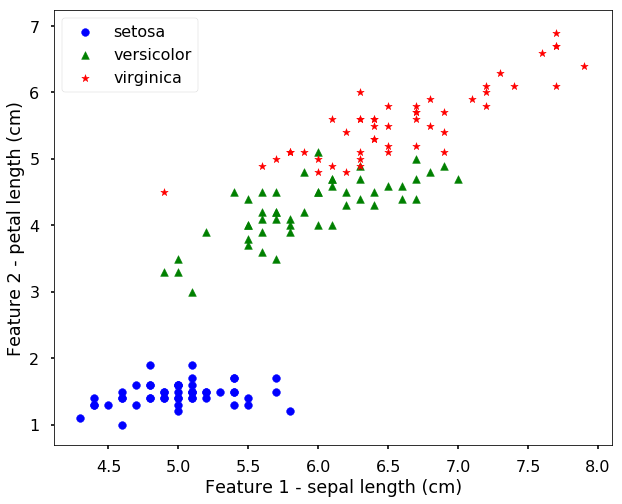

In [5]:
# let's have a look of the data first
colors = ['b', 'g', 'r']
symbols = ['o', '^', '*']
plt.figure(figsize = (10,8))
for i, c, s in (zip(range(n_class), colors, symbols)):
    ix = y == i
    plt.scatter(X[:, 0][ix], X[:, 1][ix], \
                color = c, marker = s, s = 60, \
                label = target_names[i])

plt.legend(loc = 2, scatterpoints = 1)
plt.xlabel('Feature 1 - ' + feature_names[0])
plt.ylabel('Feature 2 - ' + feature_names[2])
plt.show()

We now use the SVM in scikit-learn. The API is quite simple, for most of the algorithms they are similar. The use of the different algorithms are usually the following steps:

**Step 1:** initialize the model
**Step 2:** train the model using the *fit* function
**Step 3:** predict on the new data using the *predict* function

In [6]:
# Initialize SVM classifier
clf = svm.SVC(kernel='linear')

# Train the classifier with data
clf.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

The above print out from the *fit* function is the parameters used in the model, we can see that usually for a model there are many different parameters that you may need to tune. For SVM, two most important parameters are _C_ and *gamma*. We won't go into the details here, but a good advice is that before you use the model, always try to understand what these parameters are to get a good model. Now let's use the predict function on the training data, usually we don't do this, we need to split the data into training and testing dataset. For the testing dataset, which is not used in training at all, it is only saved for evaluation purposes. Here for simplicity, we just have a look of the results on the training data we used. 

In [7]:
# predict on the data
clf.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

We can plot the decision boundary for the model. The following function plot the decision boundary. 

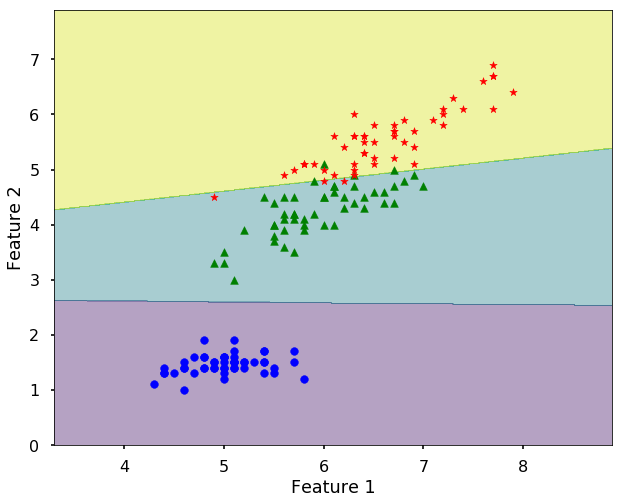

In [8]:
# Plotting decision regions
def plot_desicion_boundary(X, y, clf, title = None):
    '''
    Helper function to plot the decision boundary for the SVM
    '''
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize = (10, 8))
    plt.contourf(xx, yy, Z, alpha=0.4)
    
    for i, c, s in (zip(range(n_class), colors, symbols)):
        ix = y == i
        plt.scatter(X[:, 0][ix], X[:, 1][ix], \
                    color = c, marker = s, s = 60, \
                    label = target_names[i])
    
    if title is not None:
        plt.title(title)
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()
    
plot_desicion_boundary(X, y, clf)

We can see the linear boundaries found by the SVM for the 3 classes are generally good, and can separate most of the samples. 

Now we see how we can train a model to do the classification in Python, there are also many other models that you can use in scikit-learn, we leave this for you to explore. For example, you can use an artificial neural network (ANN) to do the same job (hint: use the *MLPClassifier* for the ANN classifier). 

<!--NAVIGATION-->
< [25.1 Concept of Machine Learning](chapter25.01-Concept-of-Machine-Learning.ipynb) | [Contents](Index.ipynb) | [25.3 Regression](chapter25.03-Regression.ipynb) >